<img src="../Archivos/images/python-logo.gif" alt="python" style="width: 700px;"/>

# Cálculo de integrales con SciPy

_`SciPy` es paquete que incluye una colección de algoritmos matemáticos y funciones construidas sobre el paquete `NumPy`. En esta clase nos vamos a centrar en el **cálculo de integrales definidas**._

Como siempre lo primero es lo primero, __importemos__ lo paquetes que vamos a utilizar:

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# scipy.integrate

Este subpaquete de `SciPy` proporciona algunas __técnicas de integración tanto de funciones como de ecuaciones diferenciales__. En primer lugar importémoslo y ejecutemos la ayuda para ver cuáles son estas funciones:

In [2]:
from scipy import integrate

In [3]:
from IPython.display import HTML
HTML('<iframe src="http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate" width="800" height="600"></iframe>')

In [4]:
help(integrate)

Help on package scipy.integrate in scipy:

NAME
    scipy.integrate

FILE
    /home/matzumiya/anaconda2/lib/python2.7/site-packages/scipy/integrate/__init__.py

DESCRIPTION
    Integration and ODEs (:mod:`scipy.integrate`)
    
    .. currentmodule:: scipy.integrate
    
    Integrating functions, given function object
    
    .. autosummary::
       :toctree: generated/
    
       quad          -- General purpose integration
       dblquad       -- General purpose double integration
       tplquad       -- General purpose triple integration
       nquad         -- General purpose n-dimensional integration
       fixed_quad    -- Integrate func(x) using Gaussian quadrature of order n
       quadrature    -- Integrate with given tolerance using Gaussian quadrature
       romberg       -- Integrate func using Romberg integration
       quad_explain  -- Print information for use of quad
       newton_cotes  -- Weights and error coefficient for Newton-Cotes integration
       Integration

### quad

Como se puede ver en la ayuda, si queremos realizar una _integración numérica_ de una función de una variable, debemos utilizar `quad` (aunque también podemos usar `trapz`, `simps`... La forma de acceder a ella tal y como hemos importado el paquete sería ejecutando `integrate.quad`. Sin emabrgo, sería más normal importar del siguiete modo:

In [5]:
from scipy.integrate import quad

De este modo se puede usar la función quad, simplemente como `quad`. Pero todavía no sabemos cómo funciona, ¿te atreves a investigarlo tú?

In [6]:
help(quad)

Help on function quad in module scipy.integrate.quadpack:

quad(func, a, b, args=(), full_output=0, epsabs=1.49e-08, epsrel=1.49e-08, limit=50, points=None, weight=None, wvar=None, wopts=None, maxp1=50, limlst=50)
    Compute a definite integral.
    
    Integrate func from `a` to `b` (possibly infinite interval) using a
    technique from the Fortran library QUADPACK.
    
    Parameters
    ----------
    func : function
        A Python function or method to integrate.  If `func` takes many
        arguments, it is integrated along the axis corresponding to the
        first argument.
        If the user desires improved integration performance, then f may
        instead be a ``ctypes`` function of the form:
    
            f(int n, double args[n]),
    
        where ``args`` is an array of function arguments and ``n`` is the
        length of ``args``. ``f.argtypes`` should be set to
        ``(c_int, c_double)``, and ``f.restype`` should be ``(c_double,)``.
    a : float
     

Quizá [esta ayuda](http://docs.scipy.org/doc/scipy/reference/integrate.html#module-scipy.integrate) te resulte más atractiva.

¿Qué es lo primero que necesitamos hacer para integrar una función? Pues sí, la función... definamos una:

$$f(x) = x \cdot sin(x)$$

In [7]:
def fun(x):
    return x * np.sin(x)

##### Ejercicio

Antes de integrarla genera esta gráfica:

![](../Archivos/images/quad_xsinx.png)

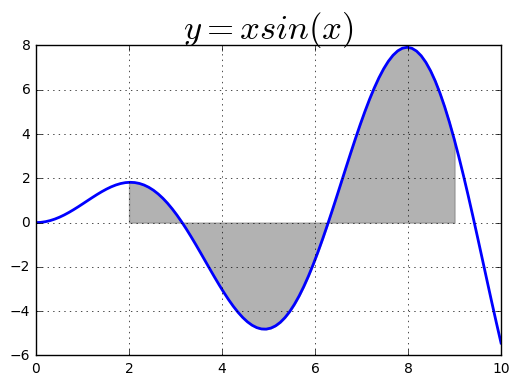

In [8]:
x = np.linspace(0,10,100)
y = fun(x)

plt.title('$y = x sin(x)$', fontsize = 25)

plt.plot(x,y, linewidth = 2)

x_fill = np.linspace(2,9,100)
y_fill = fun(x_fill)
plt.fill_between(x_fill, y_fill, color='gray', alpha = 0.6)

plt.grid()

#### Ahora integremos con `quad`

__Integremos__ la función en el intervalo $[2, 9]$. Recuerda que esto te calcula la integral, _no el área_:

In [9]:
value, err = quad(fun, 2, 9)
print("El resultado es: ", value, "con un error de: ", err)

('El resultado es: ', 6.870699742283883, 'con un error de: ', 2.864870105641461e-13)


#### Simpson y trapecio

Según figura en la documentación a estos métodos hay que pasarles las coordenadas de los puntos (no la función). Esto puede ser útil si no disponemos de una función, sino de una serie da valores, que por ejemplo, provienen de un experimento.

![](../images/trap_xsinx.png)

In [10]:
x = np.linspace(2,9,100)

value = integrate.trapz(fun(x), x)

print("El resultado es: ", value)

('El resultado es: ', 6.8674226617079848)


In [11]:
x = np.linspace(2,9,100)

value = integrate.simps(fun(x), x)

print("El resultado es: ", value)

('El resultado es: ', 6.8705759095004062)


### *[DARLE AQUI PARA SEGUIR !!](/notebooks/Modulo 2/012-Scipy-Estadistica.ipynb)*

In [4]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../Archivos/styles/aeropython.css'
HTML(open(css_file, "r").read())